# *About Dataset*

- ## Context
  ### Retail dataset of a global superstore for 4 years. 

# *Questions To Answes* : 


## Sales Trends:
- ### What are the overall sales trends over time? Can you identify any seasonal patterns?
- ### Which months or quarters have the highest sales?

## Geographical Insights:
- ### Which countries, states, or cities contribute the most to sales?
- ### Are there any regional variations in sales performance?

## Product Analysis:

- ### Which product categories or sub-categories generate the most revenue?
- ### What are the top-selling products?

## Customer Segmentation:

- ### How do sales vary across different customer segments (e.g., by segment, customer name, or customer ID)?
- ### Are there specific customer groups that drive significant sales?

## Order Patterns:
- ### Are there any common order patterns (e.g., specific combinations of products, ship modes, or regions?
- ### Do certain customers consistently place large or frequent orders?

# *Importing Libraries* 

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"/kaggle/input/superstore-dataset/train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


# *Exploring Dataset*


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
# Now we will see few details about our data as column names, non-null rows counts and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


## We Conclude that : 
- ### Number of Orders is 9789 but unique orders is 4916 .
- ### All Orders shipped by 4 modes only .
- ### Number of Customers is 793 .
- ### Number of Segments is 3 .
- ### In One Country ' US' .
- ### in 529 Cities .
- ### in 49 States .
- ### there are 3 Categories .
- ###  17 Sub-Category .
- ### and 1849 Product . 

### Now we can see number of columns : 18 column , and number of row is 9800 Except Postal Code Column 7989 , so we can indicate that their is about 10 null cells in it.

# *Data Processing*

In [11]:
# Rename 'sales' column to 'Total Sales' 
df = df.rename(columns = { 'Sales': 'Total Sales','Product ID':' Product','Sub-Category':'Sub Category' })
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product,Category,Sub Category,Product Name,Total Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [8]:
# Convert the 'Order Date' column to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format = '%d/%m/%Y')

# Create new columns for year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%b')  # Abbreviated month names

# Print the updated DataFrame
print(df[['Order Date', 'Year', 'Month']].head())

  Order Date  Year Month
0 2017-11-08  2017   Nov
1 2017-11-08  2017   Nov
2 2017-06-12  2017   Jun
3 2016-10-11  2016   Oct
4 2016-10-11  2016   Oct


In [12]:
# exploring null values 
df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
 Product         9800
Category         9800
Sub Category     9800
Product Name     9800
Total Sales      9800
Year             9800
Month            9800
dtype: int64

- ### We found postal code has 9789 rows, while the other columns have 9800, so we should to see where the nulls.

<Axes: >

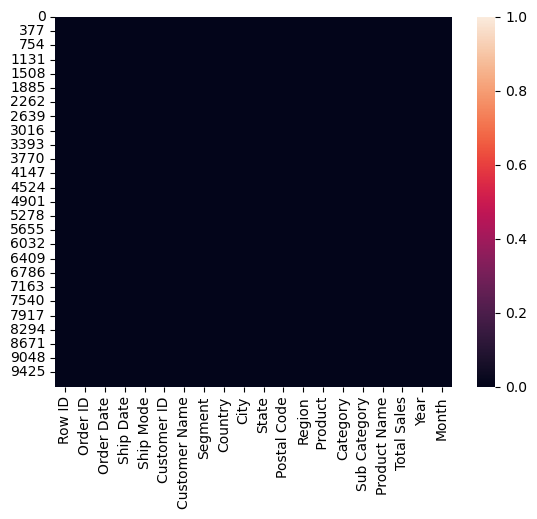

In [13]:
sns.heatmap(df.isnull())

- ### The null values is not appear in this plot, btw We will remove null values in next step.

In [14]:
df =df.dropna()
df.count()

Row ID           9789
Order ID         9789
Order Date       9789
Ship Date        9789
Ship Mode        9789
Customer ID      9789
Customer Name    9789
Segment          9789
Country          9789
City             9789
State            9789
Postal Code      9789
Region           9789
 Product         9789
Category         9789
Sub Category     9789
Product Name     9789
Total Sales      9789
Year             9789
Month            9789
dtype: int64

### Now All Counts of Row is 9789 after removing null-values.

In [15]:
# we should remove duplicated if it presents
df = df.drop_duplicates()
df.count()

Row ID           9789
Order ID         9789
Order Date       9789
Ship Date        9789
Ship Mode        9789
Customer ID      9789
Customer Name    9789
Segment          9789
Country          9789
City             9789
State            9789
Postal Code      9789
Region           9789
 Product         9789
Category         9789
Sub Category     9789
Product Name     9789
Total Sales      9789
Year             9789
Month            9789
dtype: int64

- ### We determined that there is not any duplicated values because the number of row is still 9789.


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product,Category,Sub Category,Product Name,Total Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,Nov
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,Nov
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,Jun
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,Oct
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,Oct


# *Analyzing*

In [17]:
# Calculation of Over all Sales 
Over_all_Sales =  df['Total Sales'].sum()
print(f' Over all Sales = { Over_all_Sales } $')

 Over all Sales = 2252607.6 $


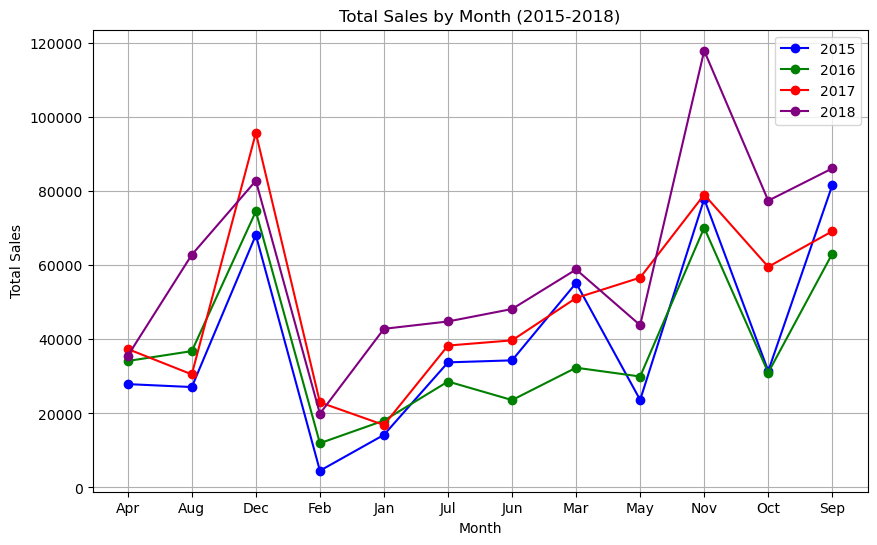

In [18]:
# Filter data for each year
df_2015 = df[df['Year'] == 2015]
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]

# Calculate total sales by month for each year
df_2015_Total_sale = df_2015.groupby('Month')['Total Sales'].sum()
df_2016_Total_sale = df_2016.groupby('Month')['Total Sales'].sum()
df_2017_Total_sale = df_2017.groupby('Month')['Total Sales'].sum()
df_2018_Total_sale = df_2018.groupby('Month')['Total Sales'].sum()

# Create a line chart for total sales by month for all years
plt.figure(figsize=(10, 6))
plt.plot(df_2015_Total_sale.index, df_2015_Total_sale.values, marker='o', color='b', label='2015')
plt.plot(df_2016_Total_sale.index, df_2016_Total_sale.values, marker='o', color='g', label='2016')
plt.plot(df_2017_Total_sale.index, df_2017_Total_sale.values, marker='o', color='r', label='2017')
plt.plot(df_2018_Total_sale.index, df_2018_Total_sale.values, marker='o', color='purple', label='2018')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month (2015-2018)')
plt.grid(True)
plt.legend()
plt.show()


- ### November and December exhibit high total sales.
- ### January and February experience low total sales.
- ### In March, April, and May, the total sales remain close to the average.

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",,
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}
# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)
# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Total Sales'].sum().reset_index()
# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)
# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Total Sales'],
    hoverinfo='location+z',
    showscale=True
))
fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

-  California leads the pack with an impressive total sales of 446,306.
-  New York follows closely in second place, boasting total sales of 306,361.
-  Texas and Washington also contribute significantly to the overall sales.
-  On the other end of the spectrum, we have the states of Wyoming (with sales at a modest (1,603) and Kansas (at 2,914).

In [12]:
# Identifying the region with the highest sales.
region_sales = df.groupby('Region')['Total Sales'].agg(["sum",'count'])
region_sales

,sum,count
Region,,
Central,492646.90,2277
East,669518.85,2785
South,389151.45,1598
West,710219.77,3140


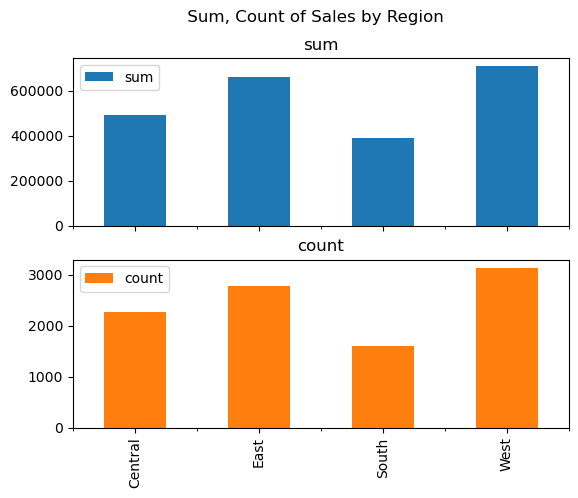

In [21]:
region_sales.plot(kind = 'bar',subplots = True, title = ' Sum, Count of Sales by Region',xlabel ="", )
plt.show()

### “The ‘West’ region leads in sales with 3,140 transactions, generating a revenue of 710,219.77. In contrast, the ‘South’ region has the lowest sales count, with 1,598 transactions and revenue of 389,151.45.”

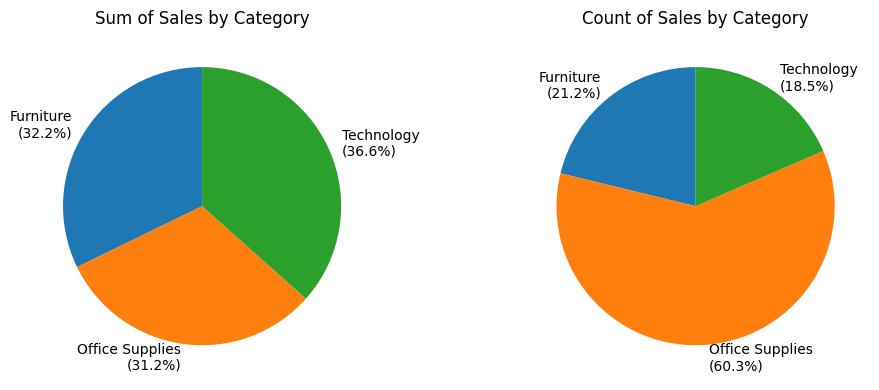

In [13]:
# Group by 'Category' and calculate the sum and count of 'Total Sales'
Sales_by_Category = df.groupby('Category')['Total Sales'].agg(['sum', 'count'])

# Create two subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart for sum of sales
sum_labels = [f"{label}\n({value:.1f}%)" for label, value in zip(Sales_by_Category.index, Sales_by_Category['sum'] / Sales_by_Category['sum'].sum() * 100)]
ax1.pie(Sales_by_Category['sum'], startangle=90, labels=sum_labels)
ax1.set_title("Sum of Sales by Category")

# Pie chart for count of sales
count_labels = [f"{label}\n({value:.1f}%)" for label, value in zip(Sales_by_Category.index, Sales_by_Category['count'] / Sales_by_Category['count'].sum() * 100)]
ax2.pie(Sales_by_Category['count'], startangle=90, labels=count_labels)
ax2.set_title("Count of Sales by Category")

# Show the plots
plt.tight_layout()
plt.show()

### Office Suppliers:-  Count of Sales: Office suppliers lead in the number of sales, accounting for 60.3% of the total.
-  Revenue: However, their revenue is the lowest at 31.2%.

### Technologies:
-  Count of Sales: Technologies are at the bottom of the ranking in terms of sales, representing 18.5%.
-  Revenue: Surprisingly, they top the revenue chart with 36.7%.

### Furniture:
-  Count of Sales: Furniture falls in the middle, making up 21.2% of the total sales.
-  Revenue: Similarly, their revenue contribution is 31.1%.

### In summary, we can infer that:
-  Technologies command higher prices.
-  Furniture and Office Suppliers have lower revenue despite their sales volume.ales volume.

In [14]:
# Groupping by Category and sub_category
CST = df.groupby(['Category', 'Sub Category'])['Total Sales'].sum().reset_index()


# Create a nested pie chart
fig = px.sunburst(
    CST,
    path=['Category', 'Sub Category'],
    values='Total Sales')

fig.show()


### Technology:
- Phones: The highest sales, totaling 327,782.
- Machines: Following closely with sales of 189,238.
- Accessories: Contributing significantly with sales of 164,186.
- Copiers: The lowest in this category, with sales at 146,248.
### Furniture:
- Chairs: Leading the way with impressive sales of 322,822.
- Tables: Next in line, with sales reaching 202,810.
- Bookcases: Contributing with sales of 113,813.
- Furnishings: The lowest sales within the furniture category, at 89,211.
### Office Supplies:
- Storage: Tops the list with sales of 219,343.
- Binders: Following closely with sales at 200,028.
- Appliances: Contributing with sales of 104,618.
- Paper: With sales of 76,828.
- Supplies and Art: These subcategories also play a role in the overall sales.

 


In [6]:
# how many Sales for each segments 
Segment_counts = df['Segment'].value_counts()
Segment_counts

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

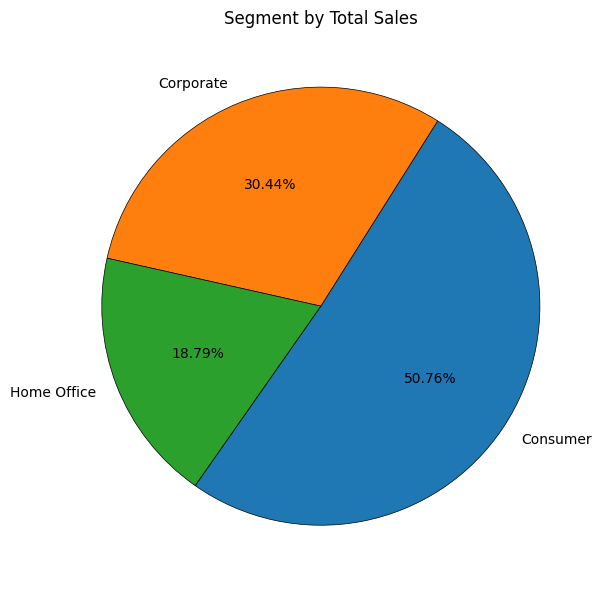

In [18]:
Segment_df = df.groupby('Segment').sum(numeric_only=True).sort_values('Total Sales', ascending=False)
Segment_df =Segment_df[['Total Sales']]
Segment_df['Count'] = df['Segment'].value_counts()
Segment_df.reset_index(inplace=True)

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(Segment_df['Total Sales'], labels=Segment_df['Segment'], autopct='%1.2f%%',
        startangle=235, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title('Segment by Total Sales')
plt.tight_layout()
plt.show()

-  Consumer Orders: These account for 51% of the total sales count.
-  Corporate Orders: Make up 30% of the total sales count.
-  Home Office Purchases: Constitute the remaining 19% of orders.
### In summary, consumers lead the way, followed by corporate clients, while home office purchases form a smaller portion of the total sales count. 
  ### ----------------------------------------------------------------------

In [27]:
ship_Mode = df['Ship Mode'].value_counts()
ship_Mode

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

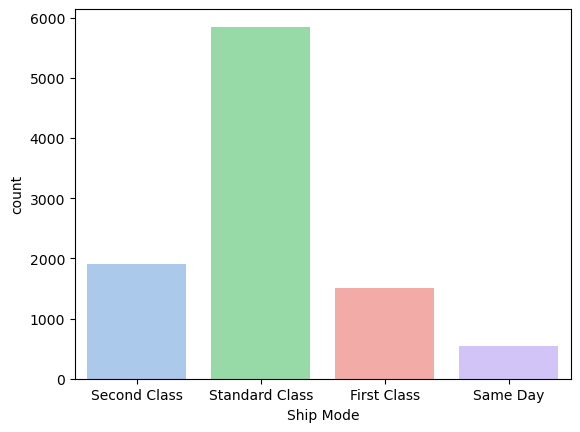

In [36]:
sns.countplot(data=df,x='Ship Mode',palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff'])
plt.show()

"The chart reveals that the Standard class is the most frequently used shipping mode, with approximately 6,000 shipments. Following closely are the First class and Second class, each accounting for around 2,000 shipments. However, Same day shipping has the lowest volume. To optimize our operations, I recommend allocating more resources to the Standard class, while reducing them for Same day shipments. Additionally, consider offering incentives for Same day shipping within the First class and Second class categories to boost their usage"

# Recommendations : 
### Target High-Performing States:
Focus your marketing efforts on states like California and New York, which exhibit high total sales. Consider tailoring promotions or campaigns specifically for these regions.

### Segment Optimization:
- Office Supplies: While they have the highest sales count, their revenue percentage is low. Explore strategies to improve revenue from this segment.
- Technologies: Despite lower sales volume, they contribute significantly to revenue. Continue to emphasize higher-priced technology products.
- Furniture: Optimize pricing and marketing efforts for this moderate-performing category.

### Subcategory Prioritization:
- Technology:
Phones: Leverage their high sales for further growth.
Machines: Continue promoting these products.
Accessories: Invest in marketing to maintain their contribution.
Copiers: Explore ways to boost sales in this subcategory.

- Furniture:
Chairs: Capitalize on their impressive sales.
Tables: Strengthen marketing efforts for tables.
Bookcases: Maintain their contribution.
Furnishings: Optimize pricing and promotion strategies.

- Office Supplies:
Storage and Binders: These lead in sales; continue to emphasize them.
Appliances and Paper: Explore ways to increase sales.
Supplies and Art: Leverage their role in overall sales.

### Consumer Segments:
- Consumer Orders: Continue targeting this segment.
- Corporate Orders: Strengthen relationships with corporate clients.
- Home Office Purchases: Explore growth opportunities within this segment.

### Shipping Mode Optimization:
- Standard class: Allocate more resources here due to its popularity.
- Same day shipping: Consider incentives to boost usage within First class and Second class categories.

### Seasonal Trends:
- November and December are high-sales months. Plan promotions accordingly.
- January and February experience low sales. Consider targeted campaigns during these months.
- March, April, and May maintain average sales; continue consistent efforts.

# Tableau Dashboard 

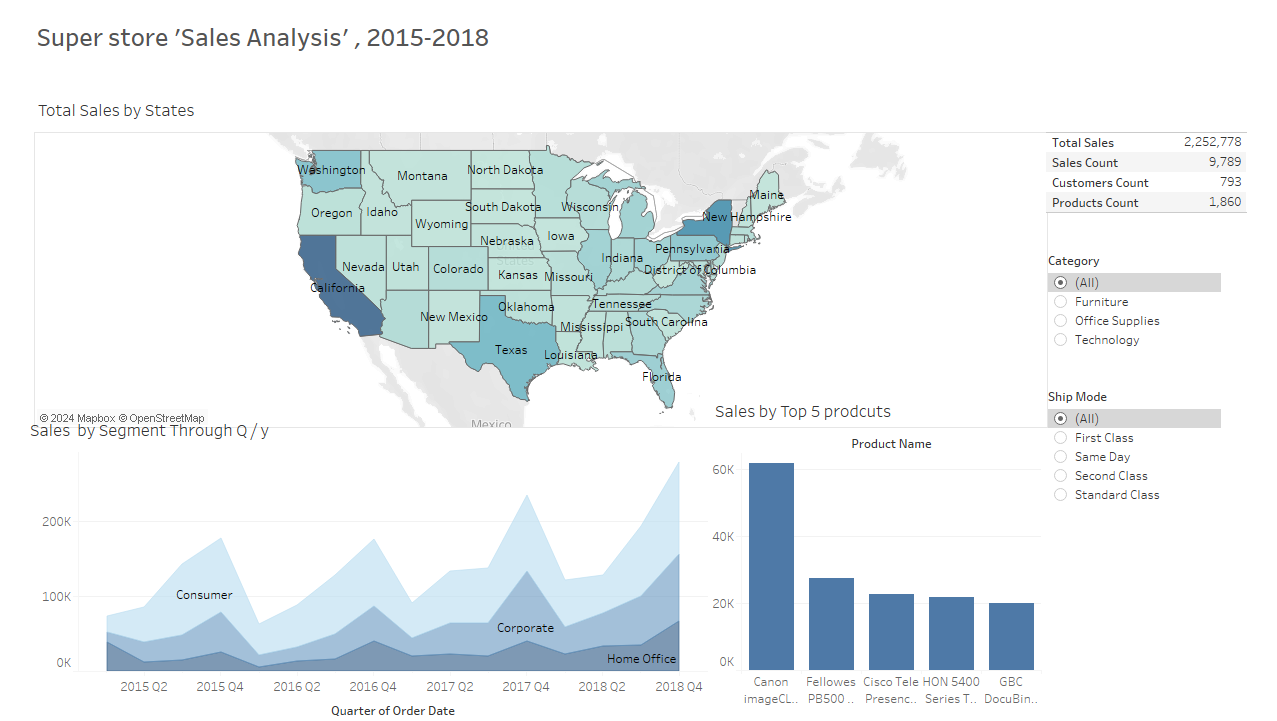